In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

## Data Loading 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/ML Project/Fnt (1).zip'

In [ ]:
dataset = ImageDataGenerator(rescale = 1/255,
                             rotation_range = 10,
                           validation_split = 0.2)
directory = '/content/Fnt'

train_gen = dataset.flow_from_directory(directory,
                                      target_size = (28,28),
                                      color_mode = 'grayscale',
                                      batch_size = 128,
                                      shuffle = True,
                                      subset = 'training',
                                      class_mode = 'sparse'
                                      )
val_gen = dataset.flow_from_directory(directory,
                                      target_size = (28,28),
                                      color_mode = 'grayscale',
                                      batch_size = 128,
                                      shuffle = True,
                                      subset = 'validation',
                                      class_mode = 'sparse')


Found 61965 images belonging to 39 classes.
Found 15470 images belonging to 39 classes.


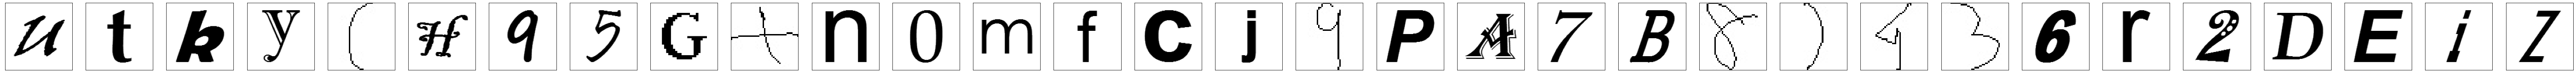

In [ ]:
folder = os.listdir(directory)
plt.figure(figsize = (100,100))

classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ()+'  
n = 1
for i in range(32):
    plt.subplot(2,32,i+1)
    image = os.listdir(f'{directory}/{folder[i]}')[0] 
    path = f'{directory}/{folder[i]}/{image}'
    img = cv2.imread(path,0)
    plt.imshow(img,cmap = 'gray')
    plt.xticks([])
    plt.yticks([])


## Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# this converts our 3D feature maps to 1D feature vectors
model.add(Dense(156,activation = 'relu'))
model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(39,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
activation_5 (Activation)    (None, 10, 10, 128)      

In [ ]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits = False),
              optimizer='adam',
              metrics=['accuracy'])
epoch = 7

history = model.fit_generator(train_gen,
                              steps_per_epoch = train_gen.samples // 128,
                              validation_data = val_gen, 
                              validation_steps = val_gen.samples // 128,
                              epochs = epoch)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7
484/484 [==============================] - 38s 78ms/step - loss: 1.3207 - accuracy: 0.6392 - val_loss: 0.5230 - val_accuracy: 0.8592
Epoch 2/7
484/484 [==============================] - 37s 75ms/step - loss: 0.5330 - accuracy: 0.8531 - val_loss: 0.3504 - val_accuracy: 0.8993
Epoch 3/7
484/484 [==============================] - 37s 76ms/step - loss: 0.3915 - accuracy: 0.8908 - val_loss: 0.3132 - val_accuracy: 0.9148
Epoch 4/7
484/484 [==============================] - 38s 78ms/step - loss: 0.3237 - accuracy: 0.9091 - val_loss: 0.3109 - val_accuracy: 0.9169
Epoch 5/7
484/484 [==============================] - 36s 74ms/step - loss: 0.2780 - accuracy: 0.9203 - val_loss: 0.2742 - val_accuracy: 0.9281
Epoch 6/7
484/484 [==============================] - 37s 77ms/step - loss: 0.2437 - accuracy: 0.9288 - val_loss: 0.2814 - val_accuracy: 0.9266
Epoch 7/7
484/484 [==============================] - 37s 76ms/step - loss: 0.2192 - accuracy: 0.9346 - val_loss: 0.2958 - val_accuracy: 0.9229

Text(0.5, 1.0, 'Accuracy')

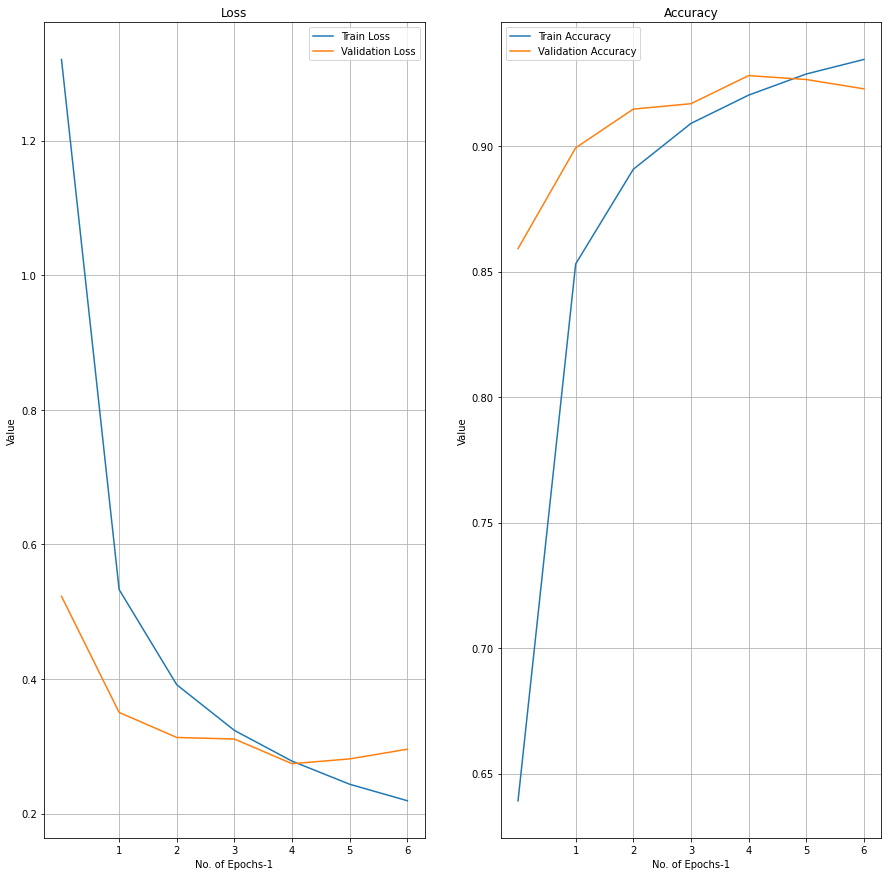

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (15,15))# (x,y)

plt.subplot(121)
plt.plot(train_loss,label = 'Train Loss')
plt.plot(val_loss,label = 'Validation Loss')
plt.grid()
plt.legend()
plt.xticks(np.arange(1,epoch,step = 1))
plt.xlabel('No. of Epochs-1')
plt.ylabel('Value')
plt.title('Loss')

plt.subplot(122)
plt.plot(train_acc,label = 'Train Accuracy')
plt.plot(val_acc,label = 'Validation Accuracy')
plt.grid()
plt.xlabel('No. of Epochs-1')
plt.legend()
plt.xticks(np.arange(1,epoch,step = 1))
plt.ylabel('Value')
plt.title('Accuracy')


## Saving Model

In [ ]:
model.save('/content/drive/MyDrive/ML Project/model',overwrite = True)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML Project/model_temp/assets
